<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-DataSet" data-toc-modified-id="Read-DataSet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read DataSet</a></span></li><li><span><a href="#Matriz-de-Correlação-e-Visualização-dos-Dados" data-toc-modified-id="Matriz-de-Correlação-e-Visualização-dos-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matriz de Correlação e Visualização dos Dados</a></span></li><li><span><a href="#Pré-processamento-e-Transformações" data-toc-modified-id="Pré-processamento-e-Transformações-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pré-processamento e Transformações</a></span></li><li><span><a href="#Normalização-Atributo-Idade-(Min--Max)" data-toc-modified-id="Normalização-Atributo-Idade-(Min--Max)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normalização Atributo Idade (Min- Max)</a></span></li><li><span><a href="#Analise-Exploratoria" data-toc-modified-id="Analise-Exploratoria-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analise Exploratoria</a></span></li><li><span><a href="#Dividindo-o-dataset-em-treinamento-e-teste-(-70%-treinamento-e-30%-teste)" data-toc-modified-id="Dividindo-o-dataset-em-treinamento-e-teste-(-70%-treinamento-e-30%-teste)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dividindo o dataset em treinamento e teste ( 70% treinamento e 30% teste)</a></span></li></ul></div>

In [114]:
# necessário instalar para ler em xlsx
##pip install  xlrd 

# Importando Librarys

In [115]:
import pandas as pd
import numpy as  np

#preprocessamento
from sklearn import preprocessing

#imagens
from IPython.display import Image as img


#bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter

#Classificadores / Algoritmos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

import warnings
warnings.filterwarnings('ignore')


## Read DataSet

In [116]:
df_cesaria = pd.read_excel ('cesarianadataset.xlsx')

In [117]:
df_cesaria.head()


,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [118]:
df_cesaria = pd.DataFrame(df_cesaria)

## Matriz de Correlação e Visualização dos Dados

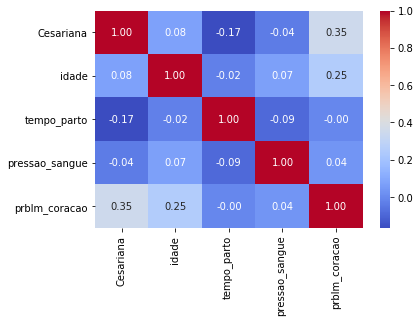

In [119]:
g = sns.heatmap(df_cesaria[["Cesariana","idade","tempo_parto","pressao_sangue","prblm_coracao"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

* Como esperado Cesariana x problema no coração tem correlação positiva Rázoavel
* Idade e Problema do Coração também possui certa relação

Portanto idade e problema do coração podem ser bons atributos para a  predição

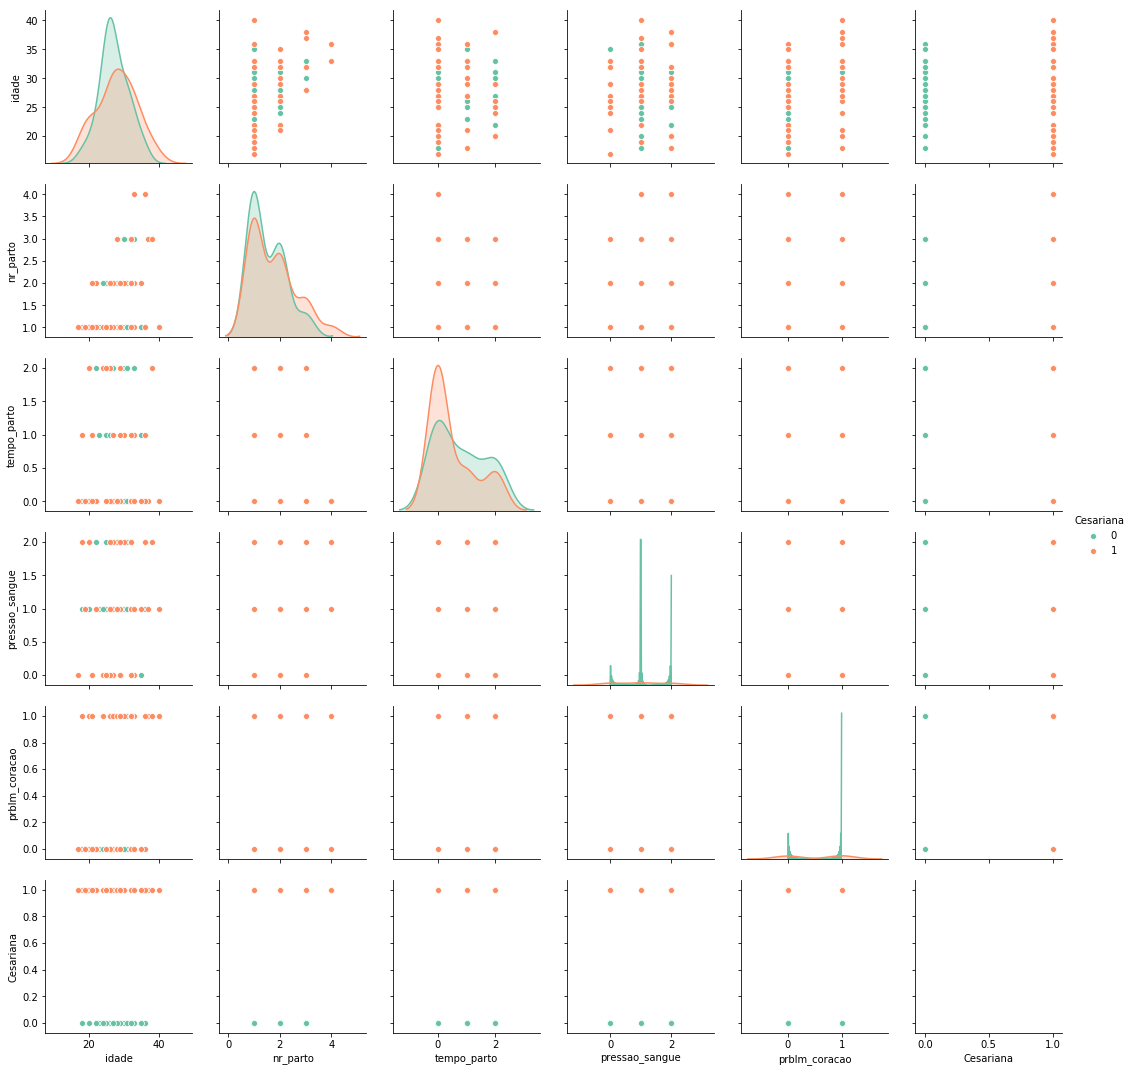

In [120]:
sns.pairplot(df_cesaria,hue="Cesariana",palette="Set2")
plt.show()

## Pré-processamento e Transformações

In [121]:
df_cesaria.loc[df_cesaria.prblm_coracao  ==  0,'Ft_prblm_coracao'] = 'Apto'

df_cesaria.loc[df_cesaria.prblm_coracao == 1,  'Ft_prblm_coracao']  = 'Inapto'

In [122]:

df_cesaria.loc[df_cesaria.pressao_sangue  ==  0,'Ft_pressao_sangue'] = 'Baixo'

df_cesaria.loc[df_cesaria.pressao_sangue == 1,  'Ft_pressao_sangue']  = 'Normal'

df_cesaria.loc[df_cesaria.pressao_sangue == 2,   'Ft_pressao_sangue']  = 'Alto'

In [123]:
df_cesaria.loc[df_cesaria.tempo_parto  ==  0,'Ft_tempo_parto'] = 'Pontual'

df_cesaria.loc[df_cesaria.tempo_parto == 1, 'Ft_tempo_parto']  = 'Prematuro'

df_cesaria.loc[df_cesaria.tempo_parto == 2, 'Ft_tempo_parto']  = 'Tardio'

In [124]:
df_cesaria.loc[df_cesaria.Cesariana  ==  0,'Clas_Cesariana']  = 'N'

df_cesaria.loc[df_cesaria.Cesariana   == 1, 'Clas_Cesariana']  = 'S'

In [125]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Ft_prblm_coracao,Ft_pressao_sangue,Ft_tempo_parto,Clas_Cesariana
0,22,1,0,2,0,0,Apto,Alto,Pontual,N
1,26,2,0,1,0,1,Apto,Normal,Pontual,S
2,26,2,1,1,0,0,Apto,Normal,Prematuro,N
3,28,1,0,2,0,0,Apto,Alto,Pontual,N
4,22,2,0,1,0,1,Apto,Normal,Pontual,S


## Normalização Atributo Idade (Min- Max)

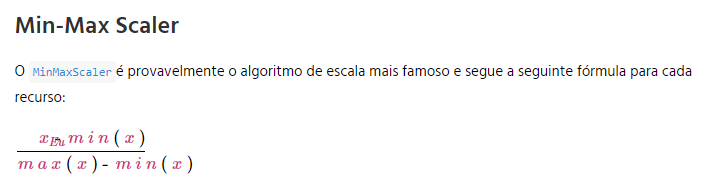

In [126]:
img('img/min_max.PNG')

In [127]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit and transform in one step
df_cesaria['Norm_idade'] = scaler.fit_transform(df_cesaria[['idade']])


df_cesaria.head()


,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Ft_prblm_coracao,Ft_pressao_sangue,Ft_tempo_parto,Clas_Cesariana,Norm_idade
0,22,1,0,2,0,0,Apto,Alto,Pontual,N,0.217391
1,26,2,0,1,0,1,Apto,Normal,Pontual,S,0.391304
2,26,2,1,1,0,0,Apto,Normal,Prematuro,N,0.391304
3,28,1,0,2,0,0,Apto,Alto,Pontual,N,0.478261
4,22,2,0,1,0,1,Apto,Normal,Pontual,S,0.217391


In [128]:
print(df_cesaria.Norm_idade.min())
print(df_cesaria.Norm_idade.max())


0.0
1.0


## Analise Exploratoria

Text(0.5, 1.0, 'Cesariana(S/N) por Idade')

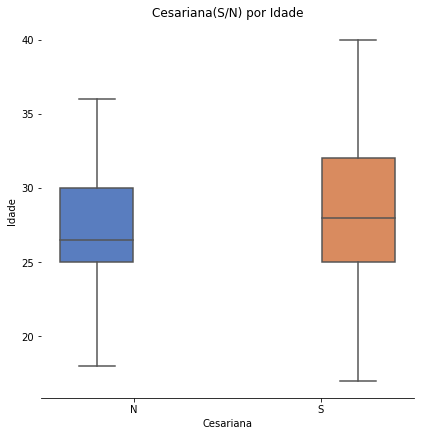

In [129]:
g = sns.factorplot(x="Clas_Cesariana",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Cesariana")
plt.title ('Cesariana(S/N) por Idade')

Text(0.5, 1.0, 'Cesariana(S/N) x prblm_coracao por Idade')

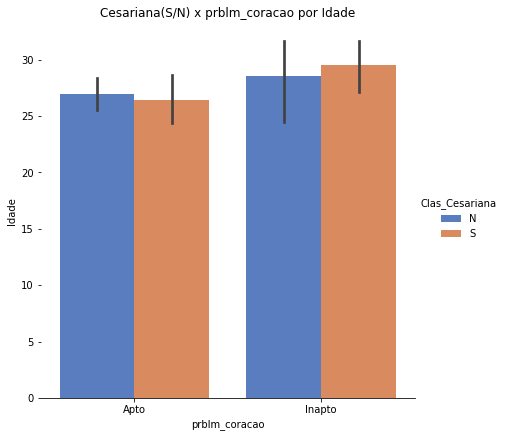

In [130]:
g = sns.factorplot(x="Ft_prblm_coracao",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("prblm_coracao")
plt.title ('Cesariana(S/N) x prblm_coracao por Idade')

Text(0.5, 1.0, 'Cesariana(S/N) x prblm_coracao por Idade')

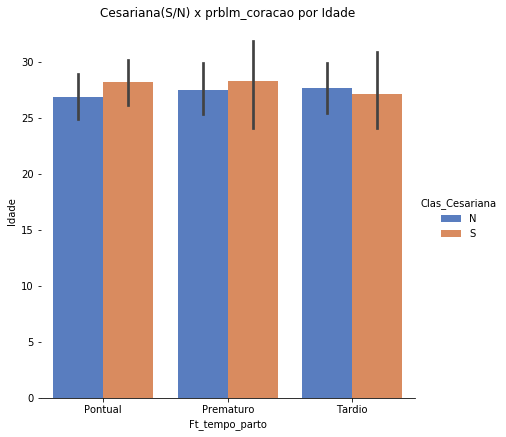

In [131]:
g = sns.factorplot(x="Ft_tempo_parto",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Ft_tempo_parto")
plt.title ('Cesariana(S/N) x prblm_coracao por Idade')

Text(0.5, 1.0, 'Cesariana(S/N) x prblm_coracao por Idade')

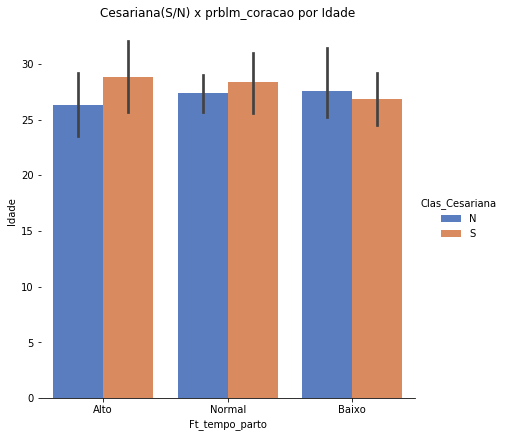

In [132]:
g = sns.factorplot(x="Ft_pressao_sangue",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Ft_tempo_parto")
plt.title ('Cesariana(S/N) x prblm_coracao por Idade')

Parto Pontual alta probabilidade de Cesarina.


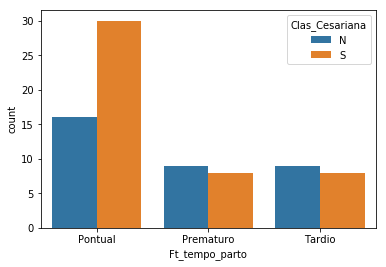

In [133]:
p = sns.countplot(data=df_cesaria,
                  x = 'Ft_tempo_parto',
                  hue = 'Clas_Cesariana')
print('Parto Pontual alta probabilidade de Cesarina.')

Pressão do Sangue Alte e baixo Indica alta probabilidade de Cesarina, como esperado


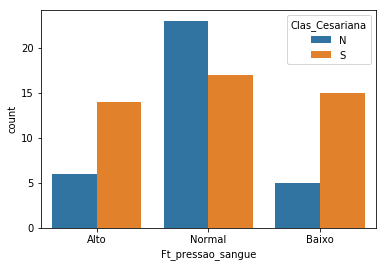

In [134]:
p = sns.countplot(data=df_cesaria,
                  x = 'Ft_pressao_sangue',
                  hue = 'Clas_Cesariana')
print('Pressão do Sangue Alte e baixo Indica alta probabilidade de Cesarina, como esperado')

Inapto Alta probabilidade de Cesariana


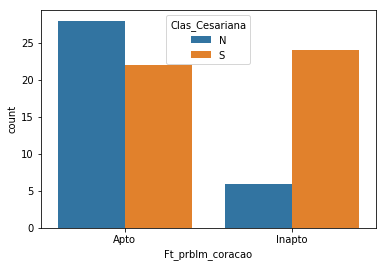

In [135]:
p = sns.countplot(data=df_cesaria,
                  x = 'Ft_prblm_coracao',
                  hue = 'Clas_Cesariana')
print('Inapto Alta probabilidade de Cesariana')

Mulheres com 3 e 4 partos possuem mais chance de realizar cesariana


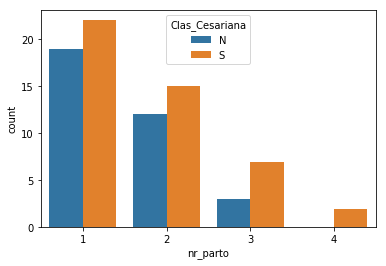

In [136]:
p = sns.countplot(data=df_cesaria,
                  x = 'nr_parto',
                  hue = 'Clas_Cesariana')
print('Mulheres com 3 e 4 partos possuem mais chance de realizar cesariana')

In [137]:
df_cesaria.groupby(['Cesariana','nr_parto']).nr_parto.count()

Cesariana  nr_parto
0          1           19
           2           12
           3            3
1          1           22
           2           15
           3            7
           4            2
Name: nr_parto, dtype: int64

In [138]:
#AGRUPANDO 1 E 2 COMO P E G, respectivamento, pois 3 e 4 geraliza bem Cesarian = 's'
df_cesaria.loc[df_cesaria.nr_parto    == 1, 'Ft_nr_parto']  = 'P'

df_cesaria.loc[df_cesaria.nr_parto   ==  2, 'Ft_nr_parto']  = 'P'

df_cesaria.loc[df_cesaria.nr_parto    == 3, 'Ft_nr_parto']  = 'G'

df_cesaria.loc[df_cesaria.nr_parto   ==  4, 'Ft_nr_parto']  = 'G'

In [139]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Ft_prblm_coracao,Ft_pressao_sangue,Ft_tempo_parto,Clas_Cesariana,Norm_idade,Ft_nr_parto
0,22,1,0,2,0,0,Apto,Alto,Pontual,N,0.217391,P
1,26,2,0,1,0,1,Apto,Normal,Pontual,S,0.391304,P
2,26,2,1,1,0,0,Apto,Normal,Prematuro,N,0.391304,P
3,28,1,0,2,0,0,Apto,Alto,Pontual,N,0.478261,P
4,22,2,0,1,0,1,Apto,Normal,Pontual,S,0.217391,P


Um grande grupo de Mulher até os 27 anos possui entre 1 e 2 partos como o esperado


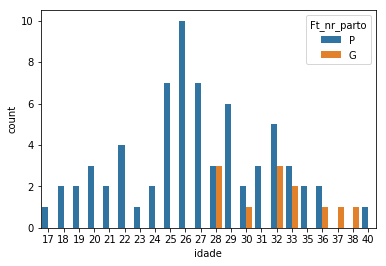

In [140]:
p = sns.countplot(data=df_cesaria,
                    x = 'idade',
                  hue = 'Ft_nr_parto')
print('Um grande grupo de Mulher até os 27 anos possui entre 1 e 2 partos como o esperado')

## Dividindo o dataset em treinamento e teste ( 70% treinamento e 30% teste)

In [173]:
from sklearn.model_selection import train_test_split
X = df_cesaria[["Cesariana"]]
y = df_cesaria.drop(labels = ["Clas_Cesariana",
                              "Cesariana",
                              "Norm_idade",
                              "Ft_nr_parto",
                              "Ft_tempo_parto",
                              'Ft_pressao_sangue',
                              'Ft_prblm_coracao',
                              ],axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [174]:
y_train

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao
55,25,2,0,1,0
17,20,1,2,2,0
60,22,1,2,2,0
62,32,2,0,0,0
6,27,2,0,1,0


In [175]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

ValueError: multiclass-multioutput is not supported